#Principle Component Analysis

# Wine Quality Analysis and Prediction

## 1. Introduction & Purpose

### Problem Statement
The goal of this analysis is to understand and predict wine quality using physicochemical attributes.  
We aim to explore unsupervised and supervised learning methods to uncover patterns and build predictive models.

### Dataset Information
- Dataset: Red wine quality dataset (`Wine_clean.csv`)
- Source: UCI Machine Learning Repository  
- Target variable: `quality`
- Features: Various chemical properties of wine (e.g., acidity, sugar, pH, alcohol)

### Objectives
We will perform:
1. Clustering: Discover natural groupings among wines.  
2. Regression: Predict numeric quality scores.  
3. Classification: Classify wines into *good* vs *not good* categories.

## Principle Component Analysis (PCA)

### What is PCA?
Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique that transforms a dataset with many correlated features into a smaller set of uncorrelated components called principal components.

Each principal component is a **linear combination** of the original features that captures as much variance (information) as possible in the data.

- PC1 (Principal Component 1): captures the largest possible variance.
- PC2 (Principal Component 2): captures the next largest variance, orthogonal to PC1.
- PC3, PC4, ... follow similarly.

This transformation helps:
- Remove redundant (correlated) features.
- Speed up training of ML models.
- Improve visualization in 2D or 3D space.
- Reduce overfitting by focusing on key variance directions.

---

### Intuitive Idea

Imagine each wine has 12 chemical features.
These features are often correlated.  
PCA finds new axes (directions) that summarize the most important variations among wines — like compressing the 12D dataset into a 2D or 3D “summary space” while keeping most of the information.

---

### Mathematical Formulation

Given a dataset $( X )$ with $( n )$ samples and $( p )$ features:

1. Standardize the data
   $$
   X_{scaled} = \frac{X - \mu}{\sigma}
   $$
   where $(\mu)$ and $( \sigma )$ are the mean and standard deviation of each feature.

2. Compute the covariance matrix
   $$
   \Sigma = \frac{1}{n - 1} X_{scaled}^T X_{scaled}
   $$
   This measures how each feature varies with others.

3. Find eigenvalues and eigenvectors of the covariance matrix
   $$
   \Sigma v_i = \lambda_i v_i
   $$
   - $( v_i )$: eigenvectors → directions of principal components  
   - $( \lambda_i )$: eigenvalues → variance explained by each component

4. Sort components by descending eigenvalue
   - The first few components explain the most variance.

5. Project data onto the top $( k )$ eigenvectors
   $$
   Z = X_{scaled} V_k
   $$
   where $( V_k )$ contains the top $( k )$ eigenvectors.

---

### Explained Variance Ratio
Each principal component explains a portion of total variance:

$$
\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_{j=1}^p \lambda_j}
$$

You can plot the cumulative explained variance curve to decide how many components to keep (look for the “elbow point”).

---

### Why PCA for Wine Quality?

- Removes correlations among chemical features.  
- Reduces 12-dimensional space into 2–3 interpretable axes.  
- Enables visualization of wine clusters in 3D space.  
- Helps regression/classification models run faster and generalize better.




In [ ]:
# IMPORTING REQUIRED LIBRARIES

# Import necessary libraries for data handling, visualization, and modeling
# Suppress warnings for cleaner output
# Use tqdm for progress bars
# Use sklearn for PCA, regression, classification, and metrics

# Suppress warnings for a cleaner notebook output
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Progress bar
from tqdm import tqdm

# Data handling
import numpy as np
import pandas as pd
from itertools import accumulate

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)


# Set seaborn style for better visuals
sns.set_context('notebook')
sns.set_style('white')


# HELPER FUNCTION — EXPLAINED VARIANCE PLOT


def plot_explained_variance(pca):
    """
    Visualize how much cumulative variance each principal component explains.
    Input: a fitted PCA object
    Output: a cumulative explained variance plot
    """
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(10, 5))
    ax.stackplot(range(pca.n_components_), acc, colors=['skyblue'])
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.set_xlabel('Number of Components', fontsize=14)
    ax.set_ylabel('Cumulative Explained Variance', fontsize=14)
    ax.set_title('PCA Explained Variance vs Components', fontsize=16)
    plt.tight_layout()
    plt.show()

 *   The cumulative variance curve shows how much total information (variance) each additional principal component captures.

 *   Typically, we look for the "elbow point" — where adding more components gives good results.

## 2. Data Preparation

### Load & Inspect Data



### Feature Preparation




In [ ]:
#  LOAD DATASET


# Load dataset containing height (inches), weight (pounds), and weight (kg)
wine_df = pd.read_csv("Data/Wine_clean.csv")
# Remove the unwanted "Unnamed: 0" column if it exists
wine_df = wine_df.loc[:, ~wine_df.columns.str.contains('^Unnamed')]

X = wine_df.drop(columns=["quality"])# Features only
y = wine_df["quality"]# Target

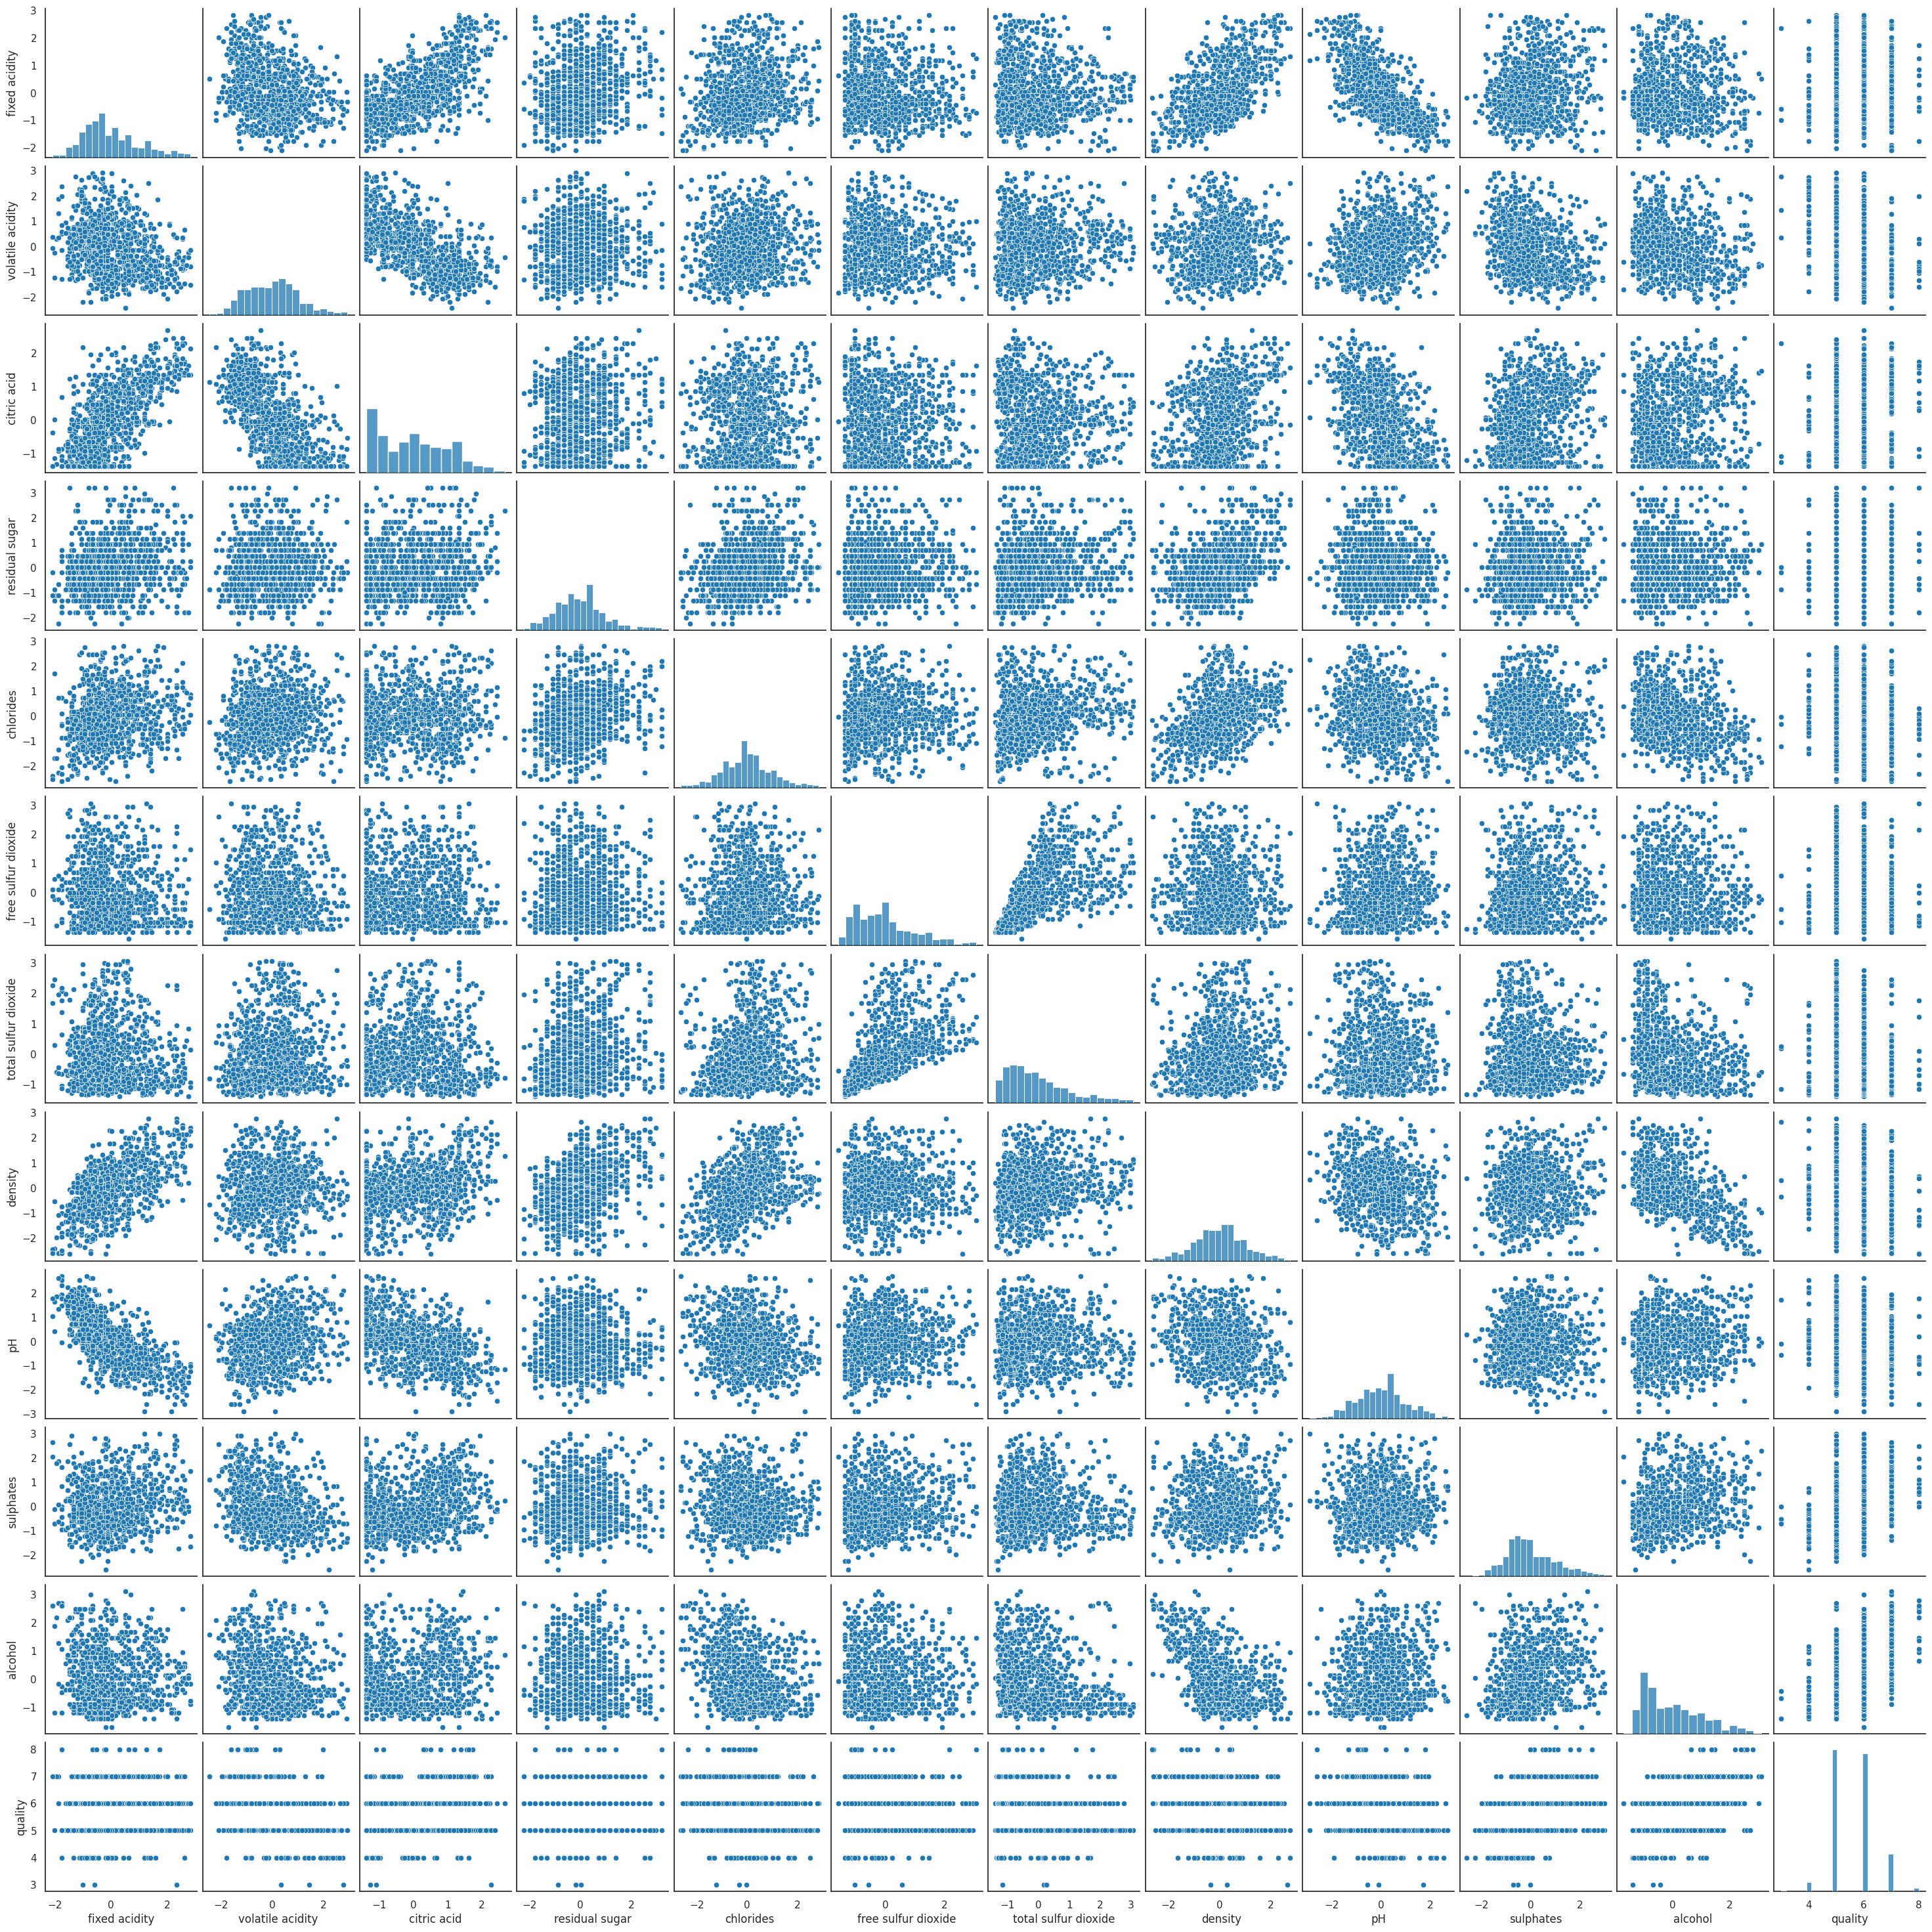

In [ ]:
#  CORRELATION CHECK

# Show pairwise relationships
sns.pairplot(wine_df)
plt.show()

# Display correlation heatmap
wine_df.corr().style.background_gradient(cmap='coolwarm')

# Observation:
# Weight (kg) and Weight (lb) are perfectly correlated — redundant info.
# PCA will detect this and remove redundancy automatically.

## 3. PCA & Clustering

### PCA




In [ ]:
#  APPLYING PCA

# Create and fit PCA model (default keeps all components)
pca = PCA()
pca.fit(X)
# Transform data into PCA feature space
Xhat = pca.transform(X)
Xhat.shape


(1194, 11)

In [ ]:
#  VISUALIZE PCA PROJECTIONS


# Create DataFrame from PCA-transformed data
wine_df_PCA = pd.DataFrame(
    data=Xhat,
    columns=[f'Projection on Component {i+1}' for i in range(len(wine_df.columns)-1)]
)
wine_df_PCA.head()

Projection on Component 1  Projection on Component 2  \
0                  -1.612161                  -1.339350   
1                  -0.365001                  -2.638215   
2                  -0.406673                  -1.720919   
3                   2.929841                   0.311051   
4                  -1.612161                  -1.339350   

   Projection on Component 3  Projection on Component 4  \
0                  -1.258905                   0.200123   
1                   0.445415                   0.661624   
2                  -0.455885                   0.399124   
3                   0.247499                  -1.845565   
4                  -1.258905                   0.200123   

   Projection on Component 5  Projection on Component 6  \
0                   1.052613                  -0.553016   
1                  -0.408646                   0.188839   
2                   0.046217                   0.198125   
3                  -0.246378                  -0.487885   
4                   1.052613                  -0.553016   

   Projection on Component 7  Projection on Component 8  \
0                  -0.419801                   0.493844   
1                   2.096717                  -0.566803   
2                   1.224982                  -0.507434   
3                  -0.524347                   0.540862   
4                  -0.419801                   0.493844   

   Projection on Component 9  Projection on Component 10  \
0                   0.083608                   -0.398609   
1                  -0.458416                    0.379216   
2                  -0.046051                   -0.032564   
3                   0.246924                   -0.449068   
4                   0.083608                   -0.398609   

   Projection on Component 11  
0                    0.020167  
1                    0.010191  
2                    0.087377  
3                   -0.271694  
4                    0.020167

In [ ]:
# Apply PCA to reduce 11 features → 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for easier handling
wine_df_PCA = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2', 'PC3']
)

wine_df_PCA.head()


PC1       PC2       PC3
0 -1.612161 -1.339350 -1.258905
1 -0.365001 -2.638215  0.445415
2 -0.406673 -1.720919 -0.455885
3  2.929841  0.311051  0.247499
4 -1.612161 -1.339350 -1.258905

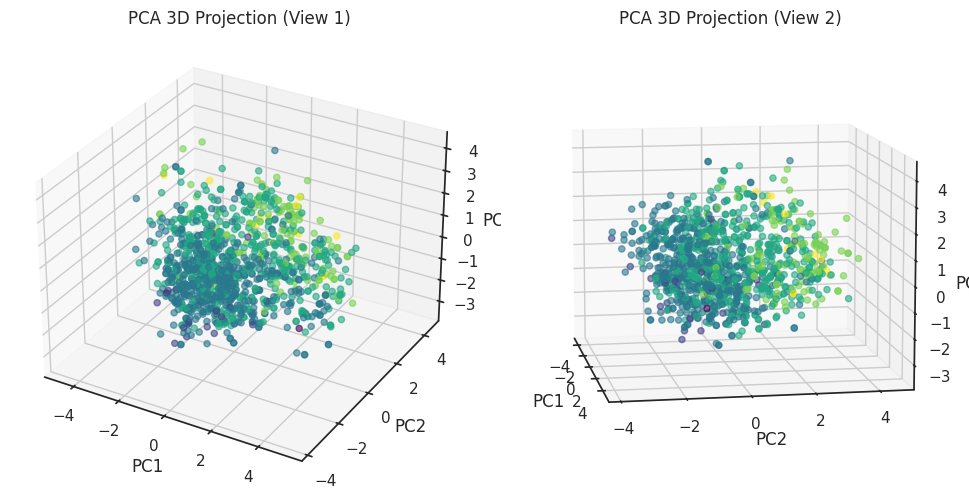

In [ ]:
#  3D VISUALIZATION OF DATA

# Create 3D subplots (two different viewing angles)
fig = plt.figure(figsize=(10, 5))

# --- Left 3D plot ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
            c=y, cmap='viridis', alpha=0.6)
ax1.set_title('PCA 3D Projection (View 1)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# --- Right 3D plot (different angle) ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=10, azim=-10)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
            c=y, cmap='viridis', alpha=0.6)
ax2.set_title('PCA 3D Projection (View 2)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.tight_layout()
plt.show()


##How to interpret the 3D PCA plot

*   Each dot = one wine sample.

*   Distance between dots = how different the wines are across all 12 features.

*   Closer dots → similar wines.

*   Clusters of same color → similar quality groupings.

*   Separation along PC1 / PC2 / PC3 → differences explained by combinations of features

🟣 / 🔵 → low-quality wines

🟢 / 🟡 → high-quality wines

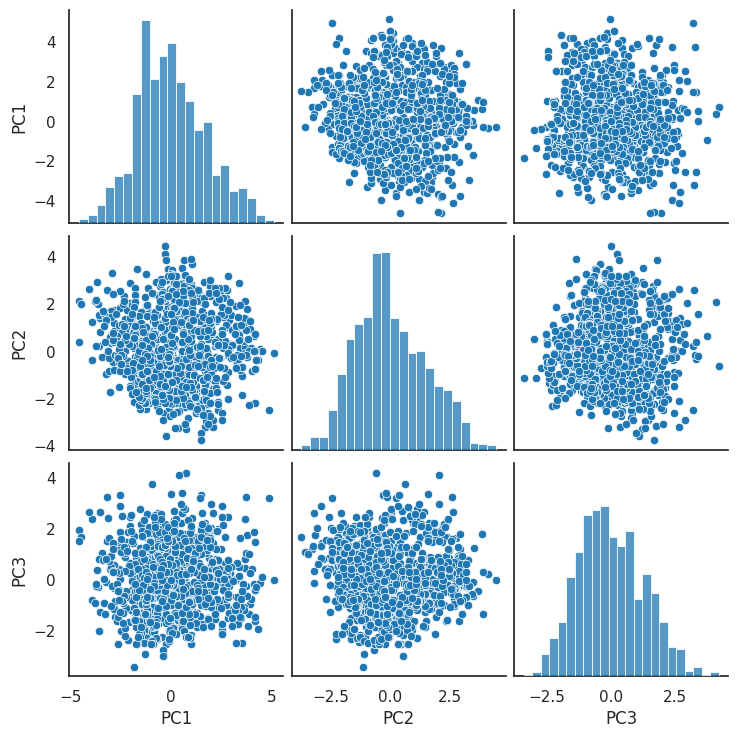

In [ ]:
# CORRELATION AFTER PCA (DECORRELATED FEATURES)


# Pairplot of PCA features
sns.pairplot(wine_df_PCA)
plt.show()

# Check correlation — should be nearly zero (uncorrelated)
wine_df_PCA.corr().style.background_gradient(cmap='coolwarm')

 *   After PCA transformation, correlations between components are nearly zero.
 *   This confirms PCA has successfully decorrelated the features, converting them into independent dimensions (orthogonal axes).
 *   This helps machine learning models learn faster and avoid redundant patterns.

Number of components to explain 95% variance: 9

Top 3 Principal Components (Variance Explained):
PC1: 26.79%
PC2: 19.92%
PC3: 14.75%


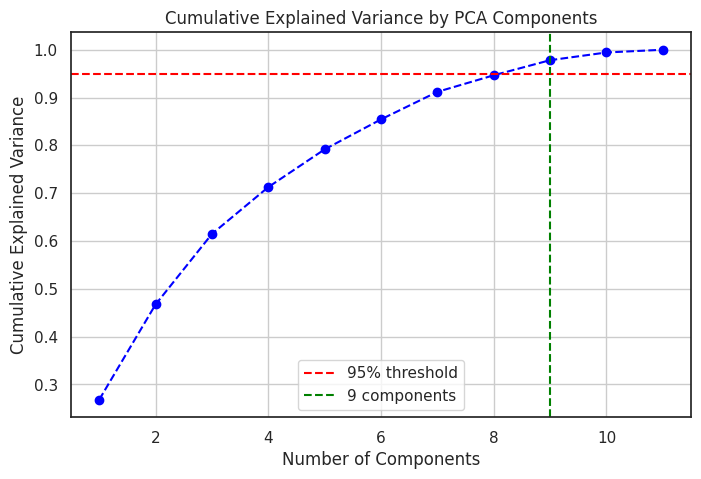

In [ ]:
# --- Explained Variance Analysis ---

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components to reach 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain 95% variance: {n_components_95}\n")

# Display top 3 principal components and their explained variance ratios
explained_ratios = pca_full.explained_variance_ratio_

print("Top 3 Principal Components (Variance Explained):")
for i in range(3):
    print(f"PC{i+1}: {explained_ratios[i]*100:.2f}%")

# Plot cumulative explained variance for visualization
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.grid(True)
plt.show()


## 4. Regression

### Linear Regression

In [ ]:
#Regression path

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, wine_df['quality'], test_size=0.2, random_state=42)

# Train linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.614
R²: 0.345


*   R² shows how much variance in wine quality is captured by PCA + linear regression.

*   Moderate R² indicates some nonlinear patterns remain.




## 5. Classification

### Models

    Logistic Regression
    KNN
    SVM


Logistic Regression provides interpretable predictions

KNN is sensitive to reduced PCA features, SVM has high precision but low recall.

PCA helps decorrelate features but may reduce nonlinear separability.

In [ ]:
#Classification path

# Binary target
y_bin = (y >= 7).astype(int)  # 1 = good wine, 0 = bad wine

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_bin, test_size=0.2, random_state=42, stratify=y_bin)

# Apply SMOTE to balance the training set
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True)
}

## 6. Model Comparison

Create a table and bar chart to summarize Accuracy, Precision, Recall, F1, ROC-AUC across models.

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.891213389121339
Precision: 0.6153846153846154
Recall: 0.27586206896551724
F1 Score: 0.38095238095238093
ROC-AUC: 0.8607553366174057
Confusion Matrix:
 [[205   5]
 [ 21   8]]

KNN Results:
Accuracy: 0.8619246861924686
Precision: 0.3888888888888889
Recall: 0.2413793103448276
F1 Score: 0.2978723404255319
ROC-AUC: 0.8298029556650246
Confusion Matrix:
 [[199  11]
 [ 22   7]]

SVM Results:
Accuracy: 0.891213389121339
Precision: 0.8
Recall: 0.13793103448275862
F1 Score: 0.23529411764705882
ROC-AUC: 0.8060755336617406
Confusion Matrix:
 [[209   1]
 [ 25   4]]
